Dataset head:
       id  gender occupation_type  avg_work_hours_per_day  \
0  10001  Female         Teacher                    6.60   
1  10002    Male   Office Worker                    9.65   
2  10003  Female         Manager                   13.77   
3  10004  Female      Freelancer                   10.94   
4  10005    Male        Engineer                    9.81   

   avg_rest_hours_per_day  avg_sleep_hours_per_day  \
0                   10.92                     5.38   
1                    7.65                     6.31   
2                    1.00                     8.02   
3                    5.18                     7.59   
4                    5.11                     7.38   

   avg_exercise_hours_per_day  age_at_death  
0                        1.10            88  
1                        0.39            76  
2                        1.21            78  
3                        0.29            74  
4                        1.70            78  

Columns:
 Index(['id',

C:\Users\mohsi\AppData\Local\Temp\ipykernel_18200\1432200788.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


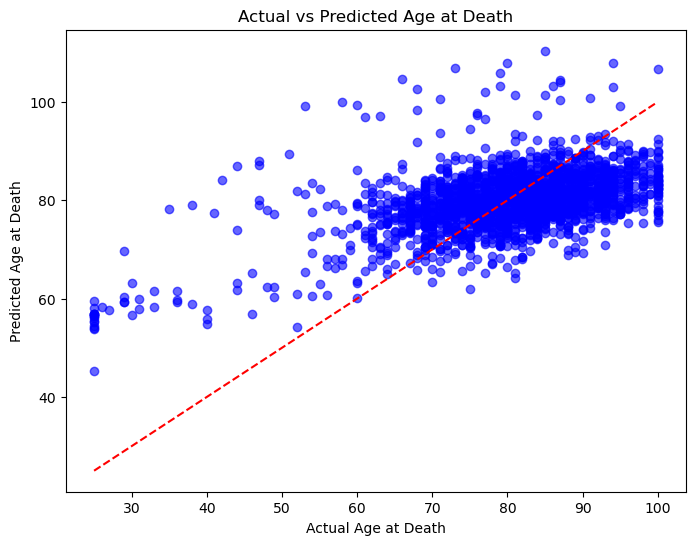

In [10]:
import pandas as pd#python famouse libray use for csv or excel file 
import numpy as np#numerical calculation tools like matrics and array
import matplotlib.pyplot as plt#this library use for graph,chart and plot
import seaborn as sns#matplotlib update version like heatmap boxplot use

from sklearn.model_selection import train_test_split#functi0on import and diide two parts training and test
from sklearn.preprocessing import StandardScaler#feature standarize 
from sklearn.linear_model import LinearRegression#strong model and find linear
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score#regression model performance use


data = pd.read_csv("D:\Mechaine_Learning_Journey\Quality of life data.csv")  #import csv file(load) 
# Dataset overview
print("Dataset head:\n", data.head())#Data frame first five row shows
print("\nColumns:\n", data.columns)#all columns name list
print("\nInfo:\n", data.info())#full summary like row, column , data type name

#create list
numeric_cols = ['avg_work_hours_per_day','avg_rest_hours_per_day','avg_sleep_hours_per_day','avg_exercise_hours_per_day']
for col in numeric_cols:#starting a loop and all columns take one by one
    data[col].fillna(data[col].mean(), inplace=True)


data['gender'] = data['gender'].map({'Male':0, 'Female':1})#gender Encoder 

# Occupation type → One-Hot Encoding
data = pd.get_dummies(data, columns=['occupation_type'], drop_first=True)#occupation encoder


y = data['age_at_death']              # Target
X = data.drop(['id','age_at_death'], axis=1)  # Features

# Confirm all numeric
print("\nFeature data types:\n", X.dtypes)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain/Test shapes:", X_train.shape, X_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Age at Death")
plt.ylabel("Predicted Age at Death")
plt.title("Actual vs Predicted Age at Death")
plt.show()
